In [1]:
#From https://towardsdatascience.com/cnn-sentiment-analysis-1d16b7c5a0e7
#testing https://realpython.com/python-keras-text-classification/
#https://medium.com/intuitive-deep-learning/autoencoders-neural-networks-for-unsupervised-learning-83af5f092f0b
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from sklearn.model_selection import train_test_split
from gensim import models
temp = pd.read_csv("persuasionExamples6.csv", sep=",", encoding ='latin-1')
data = temp[temp['containsPersuasion'] == '[1]'].copy()
data

,body,containsPersuasion
0,It is disgusting. If Will had cheated on Jada ...,[1]
1,As a man in my late 50s I wish I had the halls...,[1]
2,Im just one guy. I try to be a good person; I...,[1]
3,"He was a black, retied police chief who was mu...",[1]
4,"I hate hearing people say, ""oh, he bought a Co...",[1]
...,...,...
30885,I'm going to be honest and say I haven't read ...,[1]
30886,[removed],[1]
30887,"Im sorry if I butcher this, but this is how i...",[1]
30888,It is never really necessary to assume somethi...,[1]


In [33]:
from nltk.tokenize import sent_tokenize
data['body'][0]
data['bodySentences'] = data['body'].apply(lambda x: sent_tokenize(x))
data.head()

,body,containsPersuasion,Cleaned_Body,Text_Final,Tokens,rhetoricType,bodySentences
0,It is disgusting. If Will had cheated on Jada ...,[1],It is disgusting If Will had cheated on Jada t...,disgusting cheated jada entire internet would ...,"[disgusting, cheated, jada, entire, internet, ...",2,"[It is disgusting., If Will had cheated on Jad..."
1,As a man in my late 50s I wish I had the halls...,[1],As a man in my late 50s I wish I had the halls...,man late 50s wish halls walk job younger start...,"[man, late, 50s, wish, halls, walk, job, young...",2,[As a man in my late 50s I wish I had the hall...
2,Im just one guy. I try to be a good person; I...,[1],Im just one guy I try to be a good person I t...,im one guy try good person try treat everyone...,"[im, one, guy, try, good, person, try, treat,...",2,"[Im just one guy., I try to be a good person;..."
3,"He was a black, retied police chief who was mu...",[1],He was a black retied police chief who was mur...,black retied police chief murdered protests tr...,"[black, retied, police, chief, murdered, prote...",2,"[He was a black, retied police chief who was m..."
4,"I hate hearing people say, ""oh, he bought a Co...",[1],I hate hearing people say oh he bought a Corve...,hate hearing people say oh bought corvette hes...,"[hate, hearing, people, say, oh, bought, corve...",0,"[I hate hearing people say, ""oh, he bought a C..."


In [61]:
def removePunct(text):
    textNoPunct = ''
    textNoPunct = re.sub('['+string.punctuation+']', '', str(text))
    return textNoPunct

#data['Cleaned_Body'] = data['Body'].apply(lambda x:removePunct(x))
#data['Cleaned_Body'] = data['body'].apply(lambda x:removePunct(x))
data['Cleaned_Body'] = data['bodySentences'].apply(lambda x:[removePunct(i) for i in x])
data['Cleaned_Body'][0]

from nltk import word_tokenize
print(word_tokenize(x) for x in data.Cleaned_Body[0])
print(data['Cleaned_Body'][0][0])

<generator object <genexpr> at 0x0000018301886AC0>
It is disgusting


In [66]:
from nltk import word_tokenize
from nltk.corpus import stopwords
#tokens = [[word_tokenize(sentence) for sentence in data.Cleaned_Body]

tokens = [[word_tokenize(clause) for clause in sentence] for sentence in data.Cleaned_Body]

def lowerCase(tokens):
    return [t.lower() for t in tokens]
def removeStopWords(tokens):
    return [word for word in tokens if word not in stoplist]
#lowTokens = [lowerCase(token) for token in tokens]

lowTokens = [[lowerCase(clause) for clause in token] for token in tokens] 

stoplist = stopwords.words('english')
#filteredWords = [removeStopWords(sentence) for sentence in lowTokens]
filteredWords = [[removeStopWords(clause) for clause in sentence] for sentence in lowTokens]
#data['Text_Final'] = [' '.join(sentence) for sentence in filteredWords]

data['Text_Final'] = [[' '.join(clause) for clause in sentence] for sentence in filteredWords]

data['Tokens'] = filteredWords
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30890 entries, 0 to 30889
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   body                30890 non-null  object
 1   containsPersuasion  30890 non-null  object
 2   Cleaned_Body        30890 non-null  object
 3   Text_Final          30890 non-null  object
 4   Tokens              30890 non-null  object
 5   rhetoricType        30890 non-null  int64 
 6   bodySentences       30890 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [5]:
logos = []
ethos = []
pathos = []

# for i in data.IsRhetoric:
#     if i == -1:
        
        logos.append(0)
        pathos.append(0)
        ethos.append(0)
    if i == 1:
        logos.append(1)
        pathos.append(0)
        ethos.append(0)
    if i == 2:
        logos.append(0)
        pathos.append(1)
        ethos.append(0)
    elif i == 3:
        logos.append(0)
        pathos.append(0)
        ethos.append(1)

        
data['Logos'] = logos
data['Pathos'] = pathos
data["Ethos"] = ethos
# isRhetoric = []
# for i in data.containsPersuasion:
#     if i == 1:
#         isRhetoric.append(1)
#     else:
#         isRhetoric.append(0)

#data = data[['Text_Final', 'Tokens', 'IsRhetoric', 'Logos', 'Ethos', 'Pathos']]
data['containsPersuasion'] = isRhetoric
data = data[['Text_Final', 'Tokens', 'containsPersuasion']]
data.info()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)

In [71]:
data['Tokens'][0]

[['disgusting'],
 ['cheated', 'jada', 'entire', 'internet', 'would', 'turn', 'crucify'],
 ['except', 'man', 'one', 'mocked', 'memed'],
 ['firstly',
  'dont',
  'reason',
  'involved',
  'relationship',
  'choose',
  'make',
  'work',
  'good'],
 ['however', 'doesnt', 'mean', 'jada', 'proud', 'actions'],
 ['abused', 'trust', 'great', 'man'],
 ['im', 'kinda', 'surprised', 'internet', 'isnt', 'backing', 'honest'],
 ['fyi', 'mods', 'banned', 'posting']]

In [89]:
data_train, data_test = train_test_split(data, test_size = 0.1, random_state=40)
#all_training_words = [word for tokens in data_train["Tokens"] for word in tokens]
all_training_words = [word for tokens in data["Tokens"] for word in tokens]
#all_training_words = [[word for tokens in data["Tokens"] for word in clause] for clause in tokens]
#raining_sentence_lengths = [len(tokens) for tokens in data_train["Tokens"]]
training_sentence_lengths = [len(tokens) for tokens in data["Tokens"]]
#TRAINING_VOCAB = sorted(list(set(all_training_words)))
TRAINING_VOCAB = sorted(list(set(x) for x in all_training_words))

print("%s words total, with a vocabulary size of %s" %(len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))



print(len(data["Tokens"]))
print(all_training_words[:5])

201410 words total, with a vocabulary size of 201410
Max sentence length is 85
30890
[['disgusting'], ['cheated', 'jada', 'entire', 'internet', 'would', 'turn', 'crucify'], ['except', 'man', 'one', 'mocked', 'memed'], ['firstly', 'dont', 'reason', 'involved', 'relationship', 'choose', 'make', 'work', 'good'], ['however', 'doesnt', 'mean', 'jada', 'proud', 'actions']]


In [16]:
#all_test_words = [word for tokens in data_test["Tokens"] for word in tokens]
#test_sentence_lengths = [len(tokens) for tokens in data_test["Tokens"]]
all_test_words = [word for tokens in data["Tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data["Tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with vocab size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

1668982 words total, with vocab size of 60890
Max sentence length is 516


In [17]:
word2vec_path = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
word2vec = models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)



In [102]:
data["Text_Final"].tolist()

[['disgusting',
  'cheated jada entire internet would turn crucify',
  'except man one mocked memed',
  'firstly dont reason involved relationship choose make work good',
  'however doesnt mean jada proud actions',
  'abused trust great man',
  'im kinda surprised internet isnt backing honest',
  'fyi mods banned posting'],
 ['man late 50s wish halls walk job younger',
  'starting business spending years upper management say love millennials think change work place better',
  'seeing 22 college grad say thats job job description always gave envy boner watching middle manager retort dont like job leave millennial fire back ill send 100 apps indeed tonight new one tommorow bye',
  'wan na know makes',
  'think hard employees treated well paid todays day age job replaceable',
  'keep ghosting walking away young friends get'],
 ['i\x92m one guy',
  'try good person try treat everyone equally try kind compassionate try force good',
  'i\x92m one guy',
  'problems',
  'life',
  'shouldn\x92t

In [114]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 516
EMBEDDING_DIM = 300
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower = True, char_level = False)
#tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
#training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())
tokenizer.fit_on_texts(data["Text_Final"].tolist())
#training_sequences = tokenizer.texts_to_sequences(data["Text_Final"].tolist())
training_sequences = [tokenizer.texts_to_sequences(x) for x in data["Text_Final"]]

print(training_sequences[:5])
train_word_index = tokenizer.word_index
print('Found %s unique tokens' % len(train_word_index))

#train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)
train_cnn_data = [pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH) for x in training_sequences]


print(train_cnn_data[:5])

[[[184], [20308, 1833, 104], [96808, 167, 112], [61, 282, 31329, 833, 628, 28], [268, 330, 96, 164, 1461], [347, 76, 167], [417, 144787, 25570, 1833, 170, 825], [437]], [[167, 1122, 26906, 385], [66837, 177818, 10052, 129, 73, 69, 573, 628, 815, 259], [1541, 149428, 129, 33, 385, 385, 136, 114059, 149437, 61, 116, 385, 371, 127501, 801, 325, 160272, 211, 155865, 107105, 112, 37293], [48, 44919], [69, 270, 1311, 113, 635, 202, 1042, 385], [269, 827, 46]], [[434, 112, 742], [283, 28, 1780, 283, 254, 283, 450, 283, 28], [434, 112, 742], [590], [288], [2058, 37440, 247, 2085], [434, 529, 103, 69, 434, 807, 436], [434, 103, 169291, 971, 2085], [434, 9484], [434, 1199, 678, 439, 33775, 157202], [434, 375, 434, 112, 742], [140, 129, 62, 30075, 116, 114859, 31, 31], [158, 385, 980, 820], []], [[1901, 79400, 620, 17205, 26314], [527, 105174, 81545, 46, 165468], [28130, 152466, 26314, 213, 796, 1847, 1812, 145, 69], [140, 51002, 69, 616, 129, 151738]], [[475, 56959, 213, 129, 376, 289], [], [], 

In [159]:
print(len(training_sequences))
len(train_cnn_data)
train_cnn_data

30890


[array([[    0,     0,     0, ...,     0,     0,   184],
        [    0,     0,     0, ..., 20308,  1833,   104],
        [    0,     0,     0, ..., 96808,   167,   112],
        ...,
        [    0,     0,     0, ...,   347,    76,   167],
        [    0,     0,     0, ...,  1833,   170,   825],
        [    0,     0,     0, ...,     0,     0,   437]]),
 array([[     0,      0,      0, ...,   1122,  26906,    385],
        [     0,      0,      0, ...,    628,    815,    259],
        [     0,      0,      0, ..., 107105,    112,  37293],
        [     0,      0,      0, ...,      0,     48,  44919],
        [     0,      0,      0, ...,    202,   1042,    385],
        [     0,      0,      0, ...,    269,    827,     46]]),
 array([[     0,      0,      0, ...,    434,    112,    742],
        [     0,      0,      0, ...,    450,    283,     28],
        [     0,      0,      0, ...,    434,    112,    742],
        ...,
        [     0,      0,      0, ..., 114859,     31,     31]

In [20]:
import numpy as np

train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))

for word, index in train_word_index.items():
    train_embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
    
print(train_embedding_weights.shape)
print(len(train_word_index.items()))


(60690, 300)
60689


In [21]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
len(test_sequences)

3089

In [22]:
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.models import Model
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    
    embedding_layer = Embedding(num_words, embedding_dim, weights=[embeddings], input_length = max_sequence_length, trainable=False)
    
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    
    convs = []
    filter_sizes = [2,3,4,5,6]
    
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters = 200, kernel_size=filter_size, activation = 'relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)
        
    l_merge = concatenate(convs, axis = 1)
    
    x = Dropout(0.1)(l_merge)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation ='sigmoid')(x)
    
    model = Model(sequence_input, preds)
    model.compile(loss ='binary_crossentropy', optimizer = 'adam', metrics = ['acc'])
    model.summary()
    return model
    

In [ ]:
#label_names = ['Logos', 'Ethos', 'Pathos']
label_names = ['containsPersuasion']
y_train = data_train[label_names].values
x_train = train_cnn_data
y_tr = y_train

model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index)+1, EMBEDDING_DIM, len(list(label_names)))


In [15]:
num_epochs = 1
batch_size = 34

hist = model.fit(x_train, y_tr, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Train on 63335 samples, validate on 7038 samples
Epoch 1/2
63335/63335 [==============================] - 1516s 24ms/step - loss: 0.0035 - acc: 0.9978 - val_loss: 2.1929e-04 - val_acc: 1.0000
Epoch 2/2
63335/63335 [==============================] - 1554s 25ms/step - loss: 6.5896e-05 - acc: 1.0000 - val_loss: 7.7896e-05 - val_acc: 1.0000


In [16]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose = 1)

7820/7820 [==============================] - 70s 9ms/step


In [17]:
#labels = [1, 0, -1]
labels = [0, 1]
prediction_labels = []
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

#sum(data_test.IsRhetoric==prediction_labels)/len(prediction_labels)
sum(data_test.containsPersuasion==prediction_labels)/len(prediction_labels)

1.0

In [18]:
#data_test.IsRhetoric
data_test.containsPersuasion

77394    0
41789    0
7067     0
25360    0
66851    0
        ..
64182    0
72670    0
58514    0
21212    0
10977    0
Name: containsPersuasion, Length: 7820, dtype: int64

In [19]:
###UNSUPERVISED
# Guide used: https://machinelearningmastery.com/autoencoder-for-classification/ 
# I am attempting to follow a tutorial for training an encoder which 
#    from my understanding will allow the feature extraction neccessary for 
#    for unsupervised use
#    Currently not addapted to our datasets

In [37]:
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=100, n_informative = 10, n_redundant=90, random_state=1)
#n_inputs = X.shape[1]
# print(X.shape, y.shape)
# print(X)
# print(y)

# data = pd.read_csv("persuasionExamples6.csv", sep=",", encoding ='latin-1')
# pers = data.loc[data["containsPersuasion"] == '[1]']
# pers
X, y = train_test_split(train_embedding_weights, test_size = 0.1, random_state=40)
# y = pers['containsPersuasion']
n_inputs = X.shape[0]
train_embedding_weights.shape

(148013, 300)

In [71]:
from sklearn.preprocessing import MinMaxScaler
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=1)
X_train, X_test = train_test_split(train_embedding_weights, test_size = 0.33, random_state=40)
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)
print(X_train.shape)


(99168, 300)


In [74]:
#Encoder
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
visible = Input(shape=(n_inputs,))
    #Level 1
# e = Dense(n_inputs * 2)(visible)
e = Dense(n_inputs)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
    #Level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
    #Bottleneck Layer
n_bottleneck = n_inputs
bottleneck = Dense(n_bottleneck)(e)

Tensor("input_12:0", shape=(None, 133211), dtype=float32)


ResourceExhaustedError: OOM when allocating tensor with shape[133211,133211] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:RandomUniform]

In [56]:
from tensorflow.keras.models import Model
# Decoder
    #Level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
    #Level 2
d = Dense(n_inputs * 2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
    #Output layer
output = Dense(n_inputs, activation = 'linear')(d)

model = Model(inputs= visible, outputs = output)

In [57]:
from matplotlib import pyplot
from tensorflow.keras.utils import plot_model
model.compile(optimizer = 'adam', loss='mse')
plot_model(model, 'autoencoder_no_compress.png', show_shapes=True)

history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test, X_test))



Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Epoch 1/200
42/42 - 0s - loss: 0.2468 - val_loss: 0.1827
Epoch 2/200
42/42 - 0s - loss: 0.0413 - val_loss: 0.1167
Epoch 3/200
42/42 - 0s - loss: 0.0256 - val_loss: 0.0681
Epoch 4/200
42/42 - 0s - loss: 0.0201 - val_loss: 0.0368
Epoch 5/200
42/42 - 0s - loss: 0.0172 - val_loss: 0.0252
Epoch 6/200
42/42 - 0s - loss: 0.0148 - val_loss: 0.0158
Epoch 7/200
42/42 - 0s - loss: 0.0136 - val_loss: 0.0116
Epoch 8/200
42/42 - 0s - loss: 0.0124 - val_loss: 0.0087
Epoch 9/200
42/42 - 0s - loss: 0.0121 - val_loss: 0.0078
Epoch 10/200
42/42 - 0s - loss: 0.0109 - val_loss: 0.0069
Epoch 11/200
42/42 - 0s - loss: 0.0106 - val_loss: 0.0067
Epoch 12/200
42/42 - 0s - loss: 0.0095 - val_loss: 0.0056
Epoch 13/200
42/42 - 0s - loss: 0.0092 - val_loss: 0.0060
Epoch 14/200
42/42 - 0s - loss: 0.0092 - val_loss: 0.0052
Epoch 15/200
42/42 - 0s - loss: 0.0088 - val_loss: 0.0051
Epoch 16/200
42/42 - 0s - loss: 0.0088 - val_loss: 0.

Epoch 141/200
42/42 - 0s - loss: 0.0041 - val_loss: 0.0021
Epoch 142/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0014
Epoch 143/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0013
Epoch 144/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0021
Epoch 145/200
42/42 - 0s - loss: 0.0040 - val_loss: 0.0020
Epoch 146/200
42/42 - 0s - loss: 0.0038 - val_loss: 0.0015
Epoch 147/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0017
Epoch 148/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0017
Epoch 149/200
42/42 - 0s - loss: 0.0037 - val_loss: 0.0017
Epoch 150/200
42/42 - 0s - loss: 0.0035 - val_loss: 0.0016
Epoch 151/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0018
Epoch 152/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0016
Epoch 153/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0014
Epoch 154/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.0018
Epoch 155/200
42/42 - 0s - loss: 0.0033 - val_loss: 0.0012
Epoch 156/200
42/42 - 0s - loss: 0.0034 - val_loss: 0.0013
Epoch 157/200
42/42 - 0s - loss: 0.0036 - val_loss: 0.00

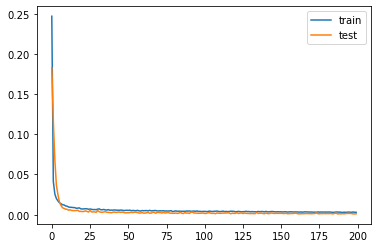

In [58]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label = 'test')

pyplot.legend()
pyplot.show()

In [23]:
#Saving encoder
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)
encoder.save('encoder.h5')

NameError: name 'visible' is not defined

In [162]:
#print(train_cnn_data[:5])
print(len(train_cnn_data))
filtered_cnn_data = list()
labelList = list()
count = 0
for i in train_cnn_data:
    for j in i:
        labelList.append(count)
    count +=1

    
print(type(train_cnn_data[:5]))
for i in train_cnn_data:
    for j in i:
        filtered_cnn_data.append(j)
        
print(filtered_cnn_data[:5])

30890
<class 'list'>
[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 

In [163]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
#X = train_cnn_data
X = filtered_cnn_data
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


In [164]:
print(len(kmeans.labels_))
print(kmeans.labels_[:50])
for i in range(10):
    print(data.iloc[i])


201410
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 2 1 1 1 1 1 1 2 2 1 1 1]
body                  It is disgusting. If Will had cheated on Jada ...
containsPersuasion                                                  [1]
Cleaned_Body          [It is disgusting, If Will had cheated on Jada...
Text_Final            [disgusting, cheated jada entire internet woul...
Tokens                [[disgusting], [cheated, jada, entire, interne...
rhetoricType                                                          2
bodySentences         [It is disgusting., If Will had cheated on Jad...
Name: 0, dtype: object
body                  As a man in my late 50s I wish I had the halls...
containsPersuasion                                                  [1]
Cleaned_Body          [As a man in my late 50s I wish I had the hall...
Text_Final            [man late 50s wish halls walk job younger, sta...
Tokens                [[man, late, 50s, wish, halls, walk, job, youn...
rhe

In [165]:
count1 = 0
count2 = 0
count3 = 0
for i in kmeans.labels_:
    if i == 0:
        count1 +=1 
    if i == 1:
        count2 +=1
    if i == 2:
        count3 += 1
print(count1)
print(count2)
print(count3)

28343
150606
22461


In [166]:
data
data['rhetoricType'] = -1
count = 0
for i, row in data.iterrows():
    if row['containsPersuasion'] == '[1]':
        data.at[i, 'rhetoricType'] = kmeans.labels_[count]
        count+=1

data

,body,containsPersuasion,Cleaned_Body,Text_Final,Tokens,rhetoricType,bodySentences
0,It is disgusting. If Will had cheated on Jada ...,[1],"[It is disgusting, If Will had cheated on Jada...","[disgusting, cheated jada entire internet woul...","[[disgusting], [cheated, jada, entire, interne...",1,"[It is disgusting., If Will had cheated on Jad..."
1,As a man in my late 50s I wish I had the halls...,[1],[As a man in my late 50s I wish I had the hall...,"[man late 50s wish halls walk job younger, sta...","[[man, late, 50s, wish, halls, walk, job, youn...",1,[As a man in my late 50s I wish I had the hall...
2,Im just one guy. I try to be a good person; I...,[1],"[Im just one guy, I try to be a good person I...","[im one guy, try good person try treat everyo...","[[im, one, guy], [try, good, person, try, tre...",1,"[Im just one guy., I try to be a good person;..."
3,"He was a black, retied police chief who was mu...",[1],[He was a black retied police chief who was mu...,[black retied police chief murdered protests t...,"[[black, retied, police, chief, murdered, prot...",1,"[He was a black, retied police chief who was m..."
4,"I hate hearing people say, ""oh, he bought a Co...",[1],[I hate hearing people say oh he bought a Corv...,[hate hearing people say oh bought corvette he...,"[[hate, hearing, people, say, oh, bought, corv...",1,"[I hate hearing people say, ""oh, he bought a C..."
...,...,...,...,...,...,...,...
30885,I'm going to be honest and say I haven't read ...,[1],[Im going to be honest and say I havent read t...,[im going honest say havent read myriad replie...,"[[im, going, honest, say, havent, read, myriad...",1,[I'm going to be honest and say I haven't read...
30886,[removed],[1],[removed],[removed],[[removed]],1,[[removed]]
30887,"Im sorry if I butcher this, but this is how i...",[1],[Im sorry if I butcher this but this is how i...,"[im sorry butcher explained, its reinforcing...","[[im, sorry, butcher, explained], [its, rein...",1,"[Im sorry if I butcher this, but this is how ..."
30888,It is never really necessary to assume somethi...,[1],[It is never really necessary to assume someth...,[never really necessary assume something someo...,"[[never, really, necessary, assume, something,...",1,[It is never really necessary to assume someth...


In [28]:
print(len(kmeans.labels_))
data["rhetoricType"].value_counts()
data.info()

30890
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30890 entries, 0 to 30889
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   body                30890 non-null  object
 1   containsPersuasion  30890 non-null  object
 2   Cleaned_Body        30890 non-null  object
 3   Text_Final          30890 non-null  object
 4   Tokens              30890 non-null  object
 5   rhetoricType        30890 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.9+ MB


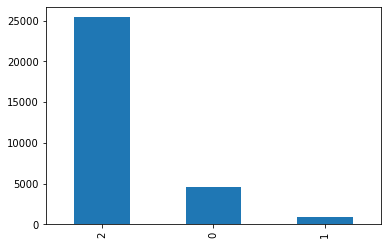

In [65]:
data['rhetoricType'].value_counts().plot(kind='bar')

In [ ]:
pd.set_option('display.max_colwidth', -1)
sample1 = data[data['rhetoricType'] == 0].iloc[:2]
print(sample1['body'])
print()
sample2 = data[data['rhetoricType'] == 1].iloc[:2]
print(sample2['body'])
print()
sample2 = data[data['rhetoricType'] == 2].iloc[:2]
print(sample2['body'])